In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Random input data to train on**

In [14]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

# Entradas = nxk = 1000x2
inputs = np.column_stack((xs, zs))
inputs.shape

(1000, 2)

**Creamos los objetivos**

Objetivos = f(x, z) = 2*x - 3*z + 5 + noise

- W1 = 2
- W2 = -3
- b0 = 5

In [15]:
noise = np.random.uniform(-1, 1, (observations, 1))

# Objetivos
targets = 2*xs - 3*zs + 5 + noise
targets.shape

(1000, 1)

**Graficamos datos de entrenamiento**

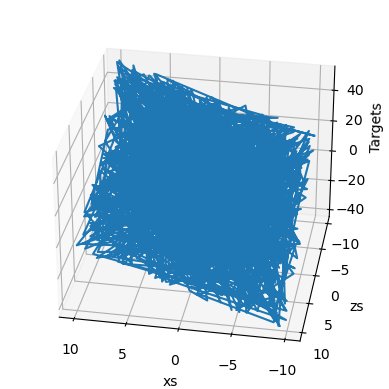

In [18]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations, 1)

**Inicializar variables**

In [49]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2, 1))
biases = np.random.uniform(-init_range, init_range, size=1)
weights, biases

(array([[0.04157104],
        [0.0883588 ]]),
 array([-0.03536146]))

**Learning rate**

In [50]:
learning_rate = 0.01

**Entrenar el modelo**

In [51]:
inputs.shape, weights.shape

((1000, 2), (2, 1))

In [52]:
n_epochs = 800
for i in range(n_epochs):
    # outputs -> 1000x2 * 2x1 + 1x1 -> 1000x1
    outputs = np.dot(inputs, weights) + biases
    
    # deltas -> 1000x1 - 1000x1 -> 1000x1
    deltas = outputs - targets

    # loss -> norma l2 = SUM( ypred - yreal )^2
    loss = np.sum(deltas ** 2) / 2 / observations
    print(f"Loss function {round(loss, 4)} for iteration {i}")

    deltas_scaled = deltas / observations

    # descenso del gradiente -> w_i+1 = w_i - learning_rate * SUM( x_i * delta_i)
    # w_i+1 = (2x1) - (1x1) * dot( 2x1000, 1000x1)
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled) 

Loss function 231.1314 for iteration 0
Loss function 109.6363 for iteration 1
Loss function 55.5187 for iteration 2
Loss function 31.3345 for iteration 3
Loss function 20.4535 for iteration 4
Loss function 15.4877 for iteration 5
Loss function 13.1542 for iteration 6
Loss function 11.9937 for iteration 7
Loss function 11.3573 for iteration 8
Loss function 10.9565 for iteration 9
Loss function 10.6629 for iteration 10
Loss function 10.4193 for iteration 11
Loss function 10.2001 for iteration 12
Loss function 9.9941 for iteration 13
Loss function 9.796 for iteration 14
Loss function 9.6036 for iteration 15
Loss function 9.4158 for iteration 16
Loss function 9.2321 for iteration 17
Loss function 9.0521 for iteration 18
Loss function 8.8758 for iteration 19
Loss function 8.703 for iteration 20
Loss function 8.5337 for iteration 21
Loss function 8.3677 for iteration 22
Loss function 8.205 for iteration 23
Loss function 8.0455 for iteration 24
Loss function 7.8892 for iteration 25
Loss funct

**Verifiquemos los valores de los pesos y sesgos**

La dependencia buscada era: t = f(xs, zs) = 2*xs - 3*zs + 5 + noise

In [53]:
print(f"{weights}, {biases}")

[[ 2.00189329]
 [-3.00323394]], [4.99313809]


**Graficamos los outputs contra los targets**

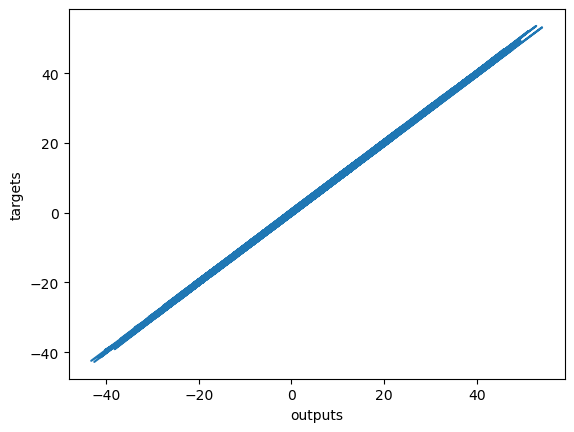

In [54]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()